In [ ]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import os
from keras import regularizers


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
mylist= os.listdir('gdrive/MyDrive/Rawdata/Actor_01')

In [ ]:
print(mylist[18])

03-01-07-01-01-02-07.wav


In [ ]:
mylist= os.listdir('gdrive/MyDrive/Rawdata/Actor_01')

In [ ]:
print(mylist[18][6:-16])

07


In [ ]:
data, sampling_rate = librosa.load('gdrive/MyDrive/Rawdata/Actor_01/03-01-01-01-01-02-01.wav')

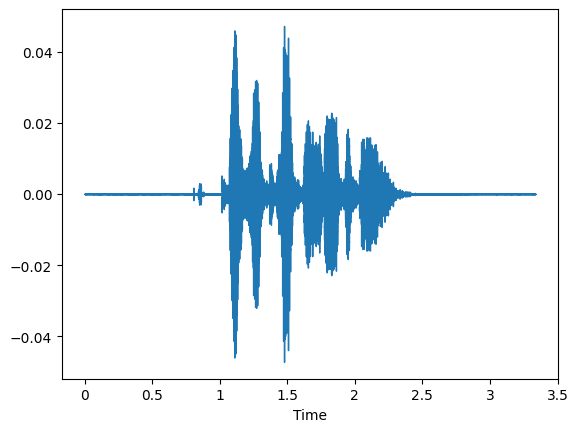

In [ ]:
path = "gdrive/MyDrive/Rawdata/Actor_01/03-01-01-01-01-02-01.wav"
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)

<ipython-input-13-519720aa7e0f>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read('gdrive/MyDrive/Rawdata/Actor_01/03-01-01-01-01-02-01.wav')
<ipython-input-13-519720aa7e0f>:26: RuntimeWarning: divide by zero encountered in log
  X[i,:] = np.log(np.abs(z[:nfft//2]))


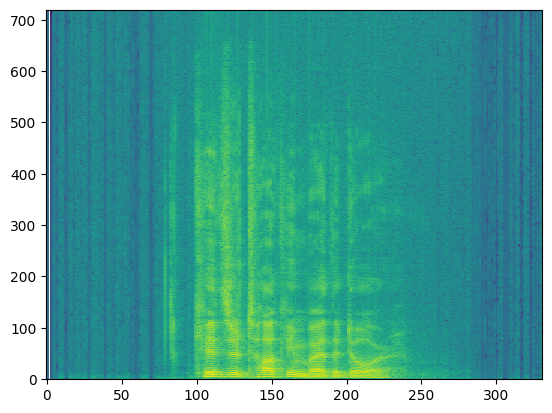

In [ ]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('gdrive/MyDrive/Rawdata/Actor_01/03-01-01-01-01-02-01.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [ ]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

In [ ]:
import pandas as pd

labels = pd.DataFrame(feeling_list)

In [ ]:
labels[:10]

,0
0,female_sad
1,male_fearful
2,female_calm
3,male_fearful
4,female_angry
5,female_calm
6,female_calm
7,male_fearful
8,female_fearful
9,female_fearful


In [ ]:
!pip uninstall resampy
!pip install resampy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.3 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y librosa
!pip install librosa

Found existing installation: librosa 0.10.0.post2
Uninstalling librosa-0.10.0.post2:
  Successfully uninstalled librosa-0.10.0.post2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.5 MB/s eta 0:00:00


In [ ]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('gdrive/MyDrive/Rawdata/Actor_01/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1   

In [ ]:
df[:5]

,feature
0,"[-56.78911, -55.15299, -51.760334, -51.643475,..."
1,"[-48.386063, -48.46027, -48.661568, -48.754475..."
2,"[-59.14186, -57.57189, -52.51562, -49.66703, -..."
3,"[-57.235355, -58.4175, -60.137405, -62.037292,..."
4,"[-46.874527, -46.270706, -47.522823, -47.16194..."


In [ ]:
df3 = pd.DataFrame(df['feature'].values.tolist())


In [ ]:
newdf = pd.concat([df3,labels], axis=1)

In [ ]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [ ]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-56.789108,-55.152988,-51.760334,-51.643475,-50.939133,-53.283829,-53.651619,-53.966118,-56.716331,-57.514690,...,-53.273090,-52.861771,-52.427303,-52.244835,-53.531155,-52.978447,-51.751694,-52.355900,-55.537624,female_sad
1,-48.386063,-48.460270,-48.661568,-48.754475,-48.983768,-48.734932,-48.290451,-48.887451,-49.331589,-48.849464,...,-46.755081,-46.938599,-48.334454,-47.749966,-48.180992,-48.386063,-47.493217,-47.437473,-47.277065,male_fearful
2,-59.141861,-57.571892,-52.515621,-49.667030,-50.455215,-52.709614,-52.650764,-51.722794,-51.405666,-55.263897,...,-56.931847,-53.773865,-54.971489,-54.666592,-52.075569,-51.311951,-53.126244,-52.388245,-49.887302,female_calm
3,-57.235355,-58.417500,-60.137405,-62.037292,-62.148239,-61.236153,-61.505539,-61.575218,-61.505695,-60.495445,...,-62.535156,-63.490238,-63.011673,-60.754665,-60.942459,-61.236443,-61.602379,-60.370037,-60.987282,male_fearful
4,-46.874527,-46.270706,-47.522823,-47.161945,-47.574581,-49.037041,-49.656681,-50.018887,-49.297508,-48.125305,...,-47.007381,-47.213463,-46.885353,-47.983421,-50.044411,-48.948784,-47.469364,-47.263062,-45.036213,female_angry


In [ ]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
628,-55.448547,-55.448547,-55.448547,-55.448547,-55.448547,-55.448547,-55.448547,-55.448547,-55.448547,-55.448547,...,-55.448547,-55.448547,-55.448547,-55.448547,-55.448547,-55.448547,-55.448547,-55.391323,-55.448547,male_angry
254,-74.444611,-74.645058,-74.631233,-74.631233,-74.631233,-74.631233,-74.631233,-74.631233,-74.631233,-74.631233,...,-68.583626,-68.291382,-65.281670,-66.786499,-68.846497,-66.102356,-63.809692,-66.590904,-70.868248,female_calm
54,-42.380859,-42.151081,-41.830673,-41.722778,-41.489601,-41.244820,-41.360031,-41.101460,-41.174072,-41.789036,...,-19.867802,-14.846079,-16.368858,-19.189274,-19.604830,-16.560421,-13.243013,-10.762669,-5.043036,male_angry
880,-69.459320,-69.443253,-68.840439,-69.228928,-68.106232,-66.813026,-67.263901,-68.969429,-67.279045,-67.232460,...,-52.638546,-53.373032,-52.581142,-52.303932,-53.281876,-51.642006,-52.420288,-51.500698,-47.184505,female_sad
579,-51.661236,-51.206356,-50.570457,-47.246334,-47.286110,-47.871498,-46.815323,-43.986259,-44.233704,-45.163906,...,-52.938469,-52.350655,-52.479122,-52.432884,-52.136929,-52.136143,-52.772114,-53.008385,-53.135323,female_fearful
107,-54.640320,-53.763424,-51.998516,-52.680630,-51.343254,-45.850655,-36.439022,-32.470058,-31.772661,-32.563110,...,-44.639484,-44.781132,-45.119652,-43.753315,-43.102623,-45.209724,-44.960655,-42.536758,-38.254028,male_sad
505,-54.791130,-53.176777,-53.725235,-53.684135,-52.713558,-52.400181,-52.888187,-51.086338,-49.757790,-51.845791,...,-31.573185,-32.322166,-31.094448,-32.656620,-31.905409,-31.831118,-34.027363,-38.194508,-40.457832,male_calm
311,-53.681492,-52.698265,-52.419876,-52.407406,-52.703842,-52.704060,-52.881699,-53.652988,-53.442471,-53.400349,...,-48.523659,-51.101254,-53.086731,-50.750832,-51.106731,-53.263645,-53.704834,-53.511917,-53.947990,female_happy
284,-54.650352,-51.236794,-50.095127,-49.657169,-49.567444,-51.290588,-51.009544,-52.172890,-51.246574,-51.017326,...,-54.063133,-53.672611,-55.368950,-57.059708,-57.774185,-57.759098,-57.602253,-56.703011,-59.147770,male_happy
913,-63.442856,-60.104893,-63.823059,-68.888634,-70.699707,-70.656425,-70.740570,-70.854088,-70.262115,-69.040009,...,-46.854874,-46.949928,-47.360760,-51.701130,-54.455833,-53.322159,-52.429337,-50.695366,-51.907089,male_calm


In [ ]:
rnewdf=rnewdf.fillna(0)

### **Dividing the data into test and train**

In [ ]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [ ]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
755,-60.076355,-60.076355,-60.076355,-60.076355,-60.076355,-60.076355,-60.076355,-60.076355,-60.076355,-60.076355,...,-54.534065,-55.570683,-57.530613,-58.424801,-57.105129,-56.682938,-58.520508,-58.039230,-59.190567,female_happy
857,-58.604168,-54.928860,-53.692654,-53.522182,-55.150642,-55.390781,-55.007107,-53.004543,-50.258114,-49.282330,...,-55.087654,-51.845039,-53.270866,-55.000553,-49.910526,-48.876919,-49.106045,-49.283169,-51.499519,female_sad
626,-62.908562,-62.908562,-62.908562,-62.908562,-62.908562,-62.908562,-62.908562,-62.908562,-62.908562,-62.908562,...,-62.908562,-62.908562,-62.908562,-62.908562,-62.908562,-62.908562,-62.908562,-62.908562,-62.908562,male_fearful
570,-61.802761,-60.646858,-62.531990,-65.584671,-65.793739,-65.793739,-65.793739,-65.793739,-65.793739,-63.589458,...,-27.551535,-27.641399,-28.516581,-29.206564,-30.010092,-30.120577,-33.494556,-36.219177,-39.304874,male_calm
906,-45.745426,-45.319885,-44.862324,-44.635216,-44.866501,-45.168240,-45.227234,-45.197186,-45.096596,-45.002254,...,-36.568275,-35.480022,-35.930759,-37.780888,-37.848129,-36.825130,-37.508232,-35.337917,-29.328266,male_angry
97,-32.765850,-33.019241,-36.096096,-35.931705,-35.872089,-35.929192,-34.584915,-35.861519,-36.118462,-37.410191,...,-45.210838,-46.085148,-45.995770,-46.170174,-46.866837,-47.589802,-48.592567,-48.852139,-50.622341,male_sad
640,-66.117561,-66.117561,-66.117561,-66.117561,-66.117561,-66.117561,-66.117561,-66.117561,-66.117561,-66.117561,...,-43.805744,-42.637253,-43.664291,-45.018288,-43.816612,-42.772095,-42.864334,-40.160992,-33.925415,female_calm
230,-59.838943,-59.838943,-59.838943,-59.838943,-59.838943,-59.838943,-59.838943,-59.838943,-59.838943,-59.838943,...,-59.838943,-59.838943,-59.838943,-59.838943,-59.838943,-59.838943,-59.838943,-59.838943,-59.838943,female_happy
63,-45.752823,-43.117100,-42.710350,-43.666416,-42.721718,-41.825596,-41.396843,-42.239700,-43.496284,-42.738041,...,-46.464878,-46.059044,-47.506260,-47.777237,-46.830345,-47.135738,-47.179214,-46.294804,-46.075893,female_fearful
805,-45.359787,-48.379128,-55.363411,-56.152580,-58.664070,-59.308262,-61.720383,-60.693253,-58.416939,-57.537125,...,-55.447758,-54.307930,-58.756950,-62.959732,-58.057663,-56.794762,-58.624695,-62.059319,-67.002495,male_sad


In [ ]:
trainfeatures = train.iloc[:, :-1]


In [ ]:

trainlabel = train.iloc[:, -1:]

In [ ]:
testfeatures = test.iloc[:, :-1]

In [ ]:
testlabel = test.iloc[:, -1:]

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(785, 216)

### **Changing dimension for CNN model**

In [ ]:
import tensorflow as tf
# Imporitnd necessary layer
from tensorflow.keras.layers import DepthwiseConv1D
from tensorflow.keras.layers import AvgPool1D
from tensorflow.keras.layers import Input,DepthwiseConv2D
from tensorflow.keras.layers import Conv2D,BatchNormalization
from tensorflow.keras.layers import ReLU,AvgPool2D,Flatten,Dense

from tensorflow.keras import Model

# **Mobilenet Model**

One of the best light weigth model to run on unsupervised data

In [ ]:
def mobilenetBlock(x,filters,strides):
  
  x=DepthwiseConv1D(kernel_size =3,strides=strides,padding='same')(x)
  x=BatchNormalization()(x)
  x=ReLU()(x)

  x=Conv1D(filters=filters, kernel_size =1,strides=1)(x)
  x=BatchNormalization()(x)
  x=ReLU()(x)

  return x

In [ ]:
input=Input(shape=(216, 256))

x=Conv1D(filters=32,kernel_size =3,strides=2,padding='same')(input)
x=BatchNormalization()(x)
x=ReLU()(x)

In [ ]:
x=mobilenetBlock(x,filters=64,strides=1)
x=mobilenetBlock(x,filters=128,strides=2)
x=mobilenetBlock(x,filters=128,strides=1)
x=mobilenetBlock(x,filters=256,strides=2)
x=mobilenetBlock(x,filters=256,strides=1)
x=mobilenetBlock(x,filters=512,strides=2)

for _ in range(5):
  x=mobilenetBlock(x,filters=512,strides=1)
x=mobilenetBlock(x,filters=1024,strides=2)
x=mobilenetBlock(x,filters=1024,strides=1)
# Use AvgPool1D in your code
x = AvgPool1D(pool_size=2, strides=1, padding='valid')(x)
# x = AvgPool1D (pool_size = 7, strides = 1)(x)
x=Flatten()(x)
output=Dense(8,activation='softmax')(x)
model=Model(inputs=input,outputs=output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 216, 256)]        0         
                                                                 
 conv1d_58 (Conv1D)          (None, 108, 32)           24608     
                                                                 
 batch_normalization_137 (Ba  (None, 108, 32)          128       
 tchNormalization)                                               
                                                                 
 re_lu_137 (ReLU)            (None, 108, 32)           0         
                                                                 
 depthwise_conv1d_55 (Depthw  (None, 108, 32)          128       
 iseConv1D)                                                      
                                                                 
 batch_normalization_138 (Ba  (None, 108, 32)          128 

In [ ]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True,show_dtype=False,show_layer_names=True,rankdir='TB',expand_nested=False,dpi=96)

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [ ]:
# Initialize a Sequential model
model = Sequential()

# Add a 1D convolutional layer with 512 filters, kernel size of 5, and padding set to "same"
# Set input shape to 216 time steps and 1 feature
model.add(Conv1D(512, 5, padding='same', input_shape=(216,1)))

# Add a BatchNormalization layer to normalize the activations of the previous layer
model.add(BatchNormalization())

# Add an activation function of ReLU to introduce nonlinearity
model.add(Activation('relu'))

# Add another 1D convolutional layer with 256 filters and kernel size of 5
model.add(Conv1D(256, 5, padding='same'))

# Add a BatchNormalization layer
model.add(BatchNormalization())

# Add another ReLU activation function
model.add(Activation('relu'))

# Add another 1D convolutional layer with 128 filters and kernel size of 5
model.add(Conv1D(128, 5, padding='same'))

# Add a BatchNormalization layer
model.add(BatchNormalization())

# Add another ReLU activation function
model.add(Activation('relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add a MaxPooling1D layer to downsample the previous layer's output
model.add(MaxPooling1D(pool_size=(8)))

# Add another 1D convolutional layer with 128 filters and kernel size of 5
model.add(Conv1D(128, 5, padding='same'))

# Add a BatchNormalization layer
model.add(BatchNormalization())

# Add another ReLU activation function
model.add(Activation('relu'))

# Add another 1D convolutional layer with 256 filters and kernel size of 5
model.add(Conv1D(256, 5, padding='same'))

# Add a BatchNormalization layer
model.add(BatchNormalization())

# Add another ReLU activation function
model.add(Activation('relu'))

# Add another 1D convolutional layer with 512 filters and kernel size of 5
model.add(Conv1D(512, 5, padding='same'))

# Add a BatchNormalization layer
model.add(BatchNormalization())

# Add another ReLU activation function
model.add(Activation('relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.3))

# Flatten the output of the previous layer
model.add(Flatten())

# Add a fully connected Dense layer with 256 units
model.add(Dense(256))

# Add a BatchNormalization layer
model.add(BatchNormalization())

# Add another ReLU activation function
model.add(Activation('relu'))

# Add another dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add another fully connected Dense layer with 10 units and a softmax activation function
model.add(Dense(10))
model.add(Activation('softmax'))

# Set the optimizer to Adam with a learning rate of 0.0001
opt = keras.optimizers.Adam(lr=0.0001)

# Compile the model using categorical crossentropy as the loss function and accuracy as the metric
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.fit(x_traincnn,y_train,epochs=15,batch_size=32,validation_data=(x_testcnn, y_test))

Epoch 1/15
25/25 [==============================] - 33s 1s/step - loss: 0.4647 - accuracy: 0.8548 - val_loss: 2.7088 - val_accuracy: 0.1200
Epoch 2/15
25/25 [==============================] - 32s 1s/step - loss: 0.4290 - accuracy: 0.8764 - val_loss: 2.6066 - val_accuracy: 0.1371
Epoch 3/15
25/25 [==============================] - 34s 1s/step - loss: 0.3853 - accuracy: 0.8904 - val_loss: 2.4462 - val_accuracy: 0.1943
Epoch 4/15
25/25 [==============================] - 31s 1s/step - loss: 0.3182 - accuracy: 0.9121 - val_loss: 2.3222 - val_accuracy: 0.2286
Epoch 5/15
25/25 [==============================] - 34s 1s/step - loss: 0.3095 - accuracy: 0.9172 - val_loss: 2.2586 - val_accuracy: 0.2629
Epoch 6/15
25/25 [==============================] - 33s 1s/step - loss: 0.2908 - accuracy: 0.9401 - val_loss: 2.0853 - val_accuracy: 0.3371
Epoch 7/15
25/25 [==============================] - 32s 1s/step - loss: 0.2639 - accuracy: 0.9363 - val_loss: 1.9839 - val_accuracy: 0.3486
Epoch 8/15
25/25 [==

In [ ]:
cnnhistory=model.fit(x_traincnn,y_train,epochs=15,batch_size=32, validation_data=(x_testcnn, y_test))

In [ ]:
# Define a Sequential model
model = Sequential()

# Add a 1D convolutional layer with 256 filters, kernel size of 5, padding of 'same',
# and input shape of (216,1). Apply a ReLU activation function.
model.add(Conv1D(256, 5, padding='same', input_shape=(216,1)))
model.add(Activation('relu'))

# Add a 1D convolutional layer with 128 filters, kernel size of 5, padding of 'same',
# and apply a ReLU activation function.
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))

# Add a dropout layer with a rate of 0.1 to randomly drop out 10% of the units
model.add(Dropout(0.1))

# Add a max pooling layer with pool size of 8 to downsample the input.
model.add(MaxPooling1D(pool_size=(8)))

# Add a 1D convolutional layer with 128 filters, kernel size of 5, padding of 'same',
# and apply a ReLU activation function.
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))

# Add a 1D convolutional layer with 128 filters, kernel size of 5, padding of 'same',
# and apply a ReLU activation function.
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))

# Add a Flatten layer to flatten the input
model.add(Flatten())

# Add a Dense layer with 10 units and a softmax activation function.
model.add(Dense(10))
model.add(Activation('softmax'))

# Define the optimizer RMSprop with a learning rate of 0.00001 and decay of 1e-6.
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

# Compile the model with categorical crossentropy as the loss function,
# RMSprop as the optimizer, and accuracy as the metric to be evaluated during training and testing.
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 216, 256)          1536      
                                                                 
 activation_10 (Activation)  (None, 216, 256)          0         
                                                                 
 conv1d_9 (Conv1D)           (None, 216, 128)          163968    
                                                                 
 activation_11 (Activation)  (None, 216, 128)          0         
                                                                 
 dropout_2 (Dropout)         (None, 216, 128)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 27, 128)          0         
 1D)                                                             
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

### **Removed the whole training part for avoiding unnecessary long epochs list**

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))


Epoch 1/700
48/48 [==============================] - 9s 143ms/step - loss: 2.4939 - accuracy: 0.0769 - val_loss: 2.2890 - val_accuracy: 0.1347
Epoch 2/700
48/48 [==============================] - 9s 195ms/step - loss: 2.2968 - accuracy: 0.1056 - val_loss: 2.2838 - val_accuracy: 0.1503
Epoch 3/700
48/48 [==============================] - 9s 180ms/step - loss: 2.2659 - accuracy: 0.1486 - val_loss: 2.2531 - val_accuracy: 0.1399
Epoch 4/700
48/48 [==============================] - 6s 134ms/step - loss: 2.2464 - accuracy: 0.1408 - val_loss: 2.2256 - val_accuracy: 0.2073
Epoch 5/700
48/48 [==============================] - 6s 124ms/step - loss: 2.2216 - accuracy: 0.1551 - val_loss: 2.2137 - val_accuracy: 0.2021
Epoch 6/700
48/48 [==============================] - 6s 121ms/step - loss: 2.2008 - accuracy: 0.1825 - val_loss: 2.1832 - val_accuracy: 0.2176
Epoch 7/700
48/48 [==============================] - 8s 173ms/step - loss: 2.1768 - accuracy: 0.2060 - val_loss: 2.1551 - val_accuracy: 0.2694

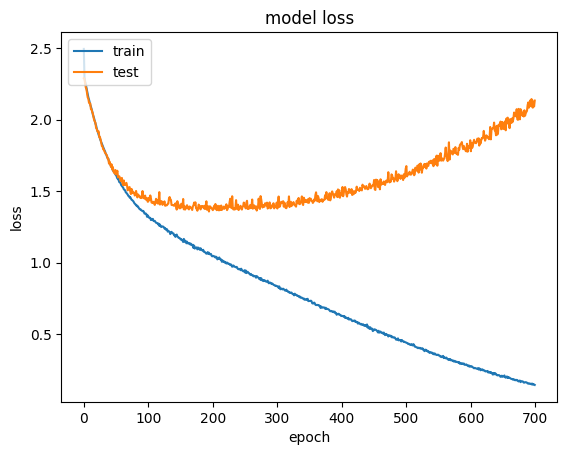

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Saving the model**

In [ ]:
# Set the name of the model file and the directory to save it in
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

# Create the save directory if it doesn't already exist
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

# Set the full path to save the model
model_path = os.path.join(save_dir, model_name)

# Save the trained model to the specified path
model.save(model_path)

# Print a message to indicate that the model has been saved
print('Saved trained model at %s ' % model_path)


Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model.h5 


In [ ]:
# Convert the model architecture to JSON format
model_json = model.to_json()

# Open a file and write the JSON data to it
with open("model.json", "w") as json_file:
    json_file.write(model_json)


### **Loading the model**

In [ ]:
# Import the necessary libraries
from keras.models import model_from_json

# Load the saved model architecture from the JSON file
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

# Create a new model with the same architecture as the saved model
loaded_model = model_from_json(loaded_model_json)

# Load the saved weights into the new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")

# Print a message to indicate that the model has been loaded
print("Loaded model from disk")

# Compile the loaded model with the same optimizer used during training
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Evaluate the loaded model on the test data
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Loaded model from disk
accuracy: 50.78%


### **Predicting emotions on the test data**

In [ ]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

7/7 [==============================] - 1s 72ms/step


In [ ]:
preds

array([[1.00903707e-02, 5.31077967e-05, 7.52074584e-06, ...,
        9.84918997e-02, 7.90245831e-03, 3.89935337e-02],
       [2.42947644e-05, 7.46076012e-07, 1.01763942e-06, ...,
        3.69573187e-04, 1.66467321e-03, 9.97925222e-01],
       [1.14979885e-05, 4.15803581e-01, 3.01659864e-04, ...,
        6.66697815e-05, 4.61560005e-04, 2.04654243e-05],
       ...,
       [9.87478942e-02, 3.25842276e-02, 3.01469952e-01, ...,
        1.32660370e-03, 4.80798185e-02, 1.02926664e-01],
       [3.35113262e-04, 9.43044070e-05, 2.81631481e-02, ...,
        4.28312551e-03, 2.01899155e-07, 8.03777084e-07],
       [2.32318509e-02, 7.35483263e-05, 1.46481127e-03, ...,
        2.73816288e-03, 9.51011300e-01, 4.06508771e-05]], dtype=float32)

In [ ]:
preds1=preds.argmax(axis=1)


In [ ]:
preds1

array([6, 9, 6, 1, 4, 9, 7, 5, 1, 1, 5, 9, 4, 8, 8, 1, 1, 3, 5, 3, 4, 1,
       2, 3, 5, 6, 2, 0, 4, 9, 4, 3, 2, 8, 0, 5, 8, 6, 2, 0, 6, 4, 9, 1,
       5, 0, 3, 1, 9, 5, 9, 3, 3, 9, 9, 5, 3, 7, 9, 3, 6, 1, 3, 5, 7, 8,
       9, 3, 6, 1, 1, 0, 9, 4, 8, 6, 3, 2, 2, 9, 7, 8, 0, 6, 7, 9, 3, 2,
       8, 2, 4, 5, 8, 5, 1, 2, 5, 8, 4, 4, 6, 3, 2, 9, 2, 3, 8, 0, 4, 8,
       7, 8, 3, 4, 3, 5, 3, 0, 3, 9, 3, 5, 9, 2, 5, 9, 2, 3, 5, 8, 4, 8,
       5, 2, 5, 1, 5, 2, 1, 3, 4, 7, 8, 1, 9, 7, 7, 5, 4, 7, 3, 5, 5, 5,
       3, 0, 1, 3, 3, 2, 2, 5, 9, 4, 2, 3, 0, 4, 5, 9, 2, 9, 6, 1, 3, 5,
       3, 3, 5, 1, 9, 1, 8, 1, 9, 4, 8, 0, 3, 6, 3, 3, 8])

In [ ]:
abc = preds1.astype(int).flatten()


In [ ]:
predictions = (lb.inverse_transform((abc)))


In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_calm
1,male_sad
2,male_calm
3,female_calm
4,female_sad
5,male_sad
6,male_fearful
7,male_angry
8,female_calm
9,female_calm


In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_calm
1,male_sad
2,female_happy
3,female_happy
4,female_fearful
5,male_sad
6,male_calm
7,male_fearful
8,female_calm
9,female_sad


In [ ]:
finaldf = actualdf.join(preddf)

### **Actual v/s Predicted emotions**

In [ ]:
finaldf[170:180]


,actualvalues,predictedvalues
170,female_angry,female_fearful
171,male_fearful,male_sad
172,male_sad,male_calm
173,female_calm,female_calm
174,female_happy,female_happy
175,male_angry,male_angry
176,female_fearful,female_happy
177,female_happy,female_happy
178,male_fearful,male_angry
179,female_sad,female_calm


In [ ]:
finaldf.groupby('actualvalues').count()


,predictedvalues
actualvalues,
female_angry,18
female_calm,24
female_fearful,18
female_happy,21
female_sad,24
male_angry,24
male_calm,19
male_fearful,14
male_happy,12


In [ ]:
finaldf.groupby('predictedvalues').count()


,actualvalues
predictedvalues,
female_angry,11
female_calm,20
female_fearful,19
female_happy,33
female_sad,18
male_angry,27
male_calm,12
male_fearful,10
male_happy,19


In [ ]:
finaldf.to_csv('Predictions.csv', index=False)


### **Live Demo**

In [ ]:
file_path = '/content/gdrive/MyDrive/Rawdata/output.wav'
data, sampling_rate = librosa.load(file_path)

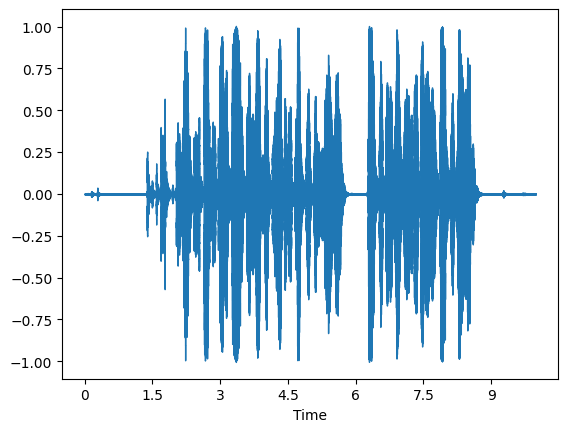

In [ ]:
path = "/content/gdrive/MyDrive/Rawdata/output.wav"
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)

In [ ]:
X, sample_rate = librosa.load('/content/gdrive/MyDrive/Rawdata/output.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [ ]:
livedf2= pd.DataFrame(data=livedf2)

In [ ]:
livedf2 = livedf2.stack().to_frame().T

In [ ]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-29.36891,-27.40519,-26.12738,-26.703773,-28.37081,-30.470486,-30.668295,-30.646715,-33.196907,-31.149109,...,-28.33489,-27.023043,-26.888149,-27.638399,-29.277372,-30.047436,-30.60153,-27.602037,-14.83171,-6.422699


In [ ]:
twodim= np.expand_dims(livedf2, axis=2)

In [ ]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 43ms/step


In [ ]:
livepreds


array([[9.8127663e-01, 5.0561394e-10, 2.7192104e-09, 7.2585244e-08,
        6.9184408e-10, 1.6152754e-02, 6.4406080e-10, 1.0343378e-03,
        1.9323669e-04, 1.3430744e-03]], dtype=float32)

In [ ]:
livepreds1=livepreds.argmax(axis=1)


In [ ]:
liveabc = livepreds1.astype(int).flatten()


In [ ]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['female_angry'], dtype=object)